# "Bivariate" BMM for n = 3, ..., N models

### Author: Alexandra Semposki

### Date: 14 November 2022

Unlike the last notebook, Bivariate_Test, this one focusses on the N model case for this SAMBA mixing technique. Hence, it is no longer truly bivariate, but multivariate. This will only mix the models together in the Gaussian format without employing any GPs (yet). 

In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import AutoMinorLocator

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
})

In [2]:
import sys
sys.path.append('../../Taweret')
from Taweret.models.samba_models import *
from Taweret.mix.gaussian import *

In [3]:
#list of models to mix
orders = [3,5,7]
model_1 = loworder(order=orders[0])
model_2 = loworder(order=orders[1])
model_3 = highorder(order=orders[2])

#set a dict of models to pass in
models = {'1': model_1,
          '2': model_2,
          '3': model_3}

#check model dict
print(models, type(models))

{'1': <Taweret.models.samba_models.loworder object at 0x0000018A411C9250>, '2': <Taweret.models.samba_models.loworder object at 0x0000018A411C92B0>, '3': <Taweret.models.samba_models.highorder object at 0x0000018A411C9280>} <class 'dict'>


In [4]:
#predict functions for the plot
g = np.linspace(1e-6, 1.0, 100)
predict = []

for i in models.keys():
    predict.append(models[i].evaluate(g))

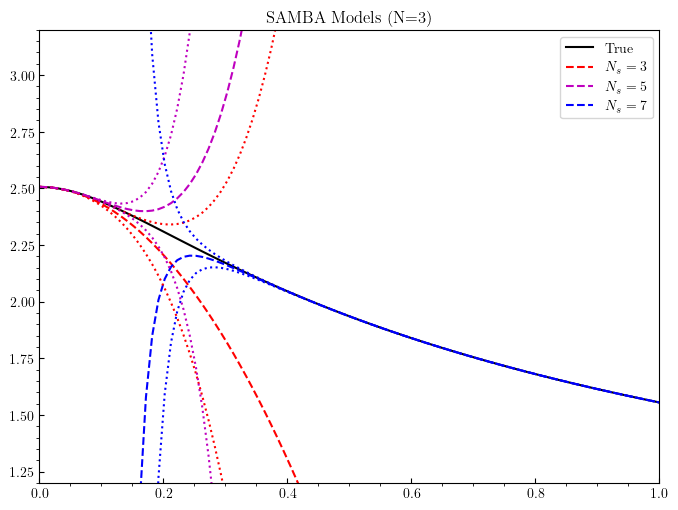

In [5]:
#plot to check choices
fig = plt.figure(figsize=(8,6), dpi=100)
ax = plt.axes()
ax.set_xlim(0.0,1.0)
ax.set_ylim(1.2,3.2)
ax.tick_params(axis='x', direction='in')
ax.tick_params(axis='y', direction='in')
ax.locator_params(nbins=8)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_title('SAMBA Models (N=3)')

#truth
ax.plot(g, true_model().evaluate(g)[0].flatten(), 'k', label='True')

#colour wheel
colors = ['r', 'm', 'b']
lines = ['dashed', 'dotted']

#models
for i in range(len(predict)):
    ax.plot(g, predict[i][0].flatten(), color=colors[i], linestyle=lines[0], label=r'$N_s={}$'.format(orders[i]))

#uncertainties
for i in range(len(predict)):
    ax.plot(g, predict[i][0].flatten() - predict[i][1].flatten(), color=colors[i], linestyle=lines[1])
    ax.plot(g, predict[i][0].flatten() + predict[i][1].flatten(), color=colors[i], linestyle=lines[1])

ax.legend()

In [9]:
#call bivariate method and mix
mixed = Multivariate(g, models)
posterior_draws, mixed_mean, mixed_intervals, std_dev = mixed.predict(ci=[68,95])

In [18]:
#check the size of the intervals
#print(type(mixed_intervals), mixed_intervals)

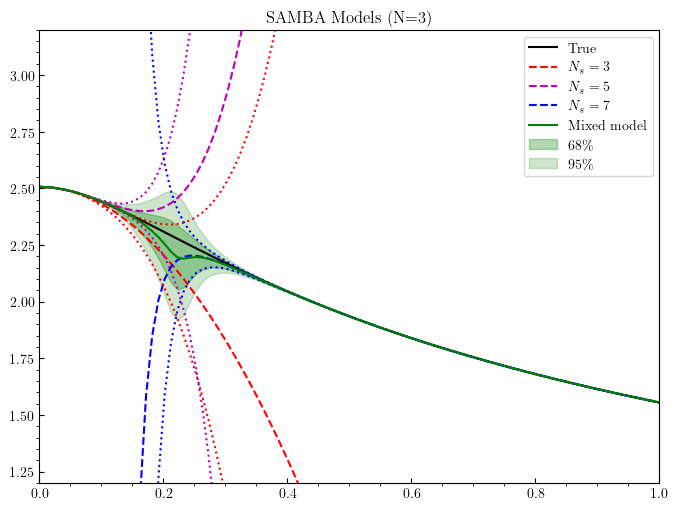

In [17]:
#plot to check choices
fig = plt.figure(figsize=(8,6), dpi=100)
ax = plt.axes()
ax.set_xlim(0.0,1.0)
ax.set_ylim(1.2,3.2)
ax.tick_params(axis='x', direction='in')
ax.tick_params(axis='y', direction='in')
ax.locator_params(nbins=8)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_title('SAMBA Models (N=3)')

#truth
ax.plot(g, true_model().evaluate(g)[0].flatten(), 'k', label='True')

#colour wheel
colors = ['r', 'm', 'b']
lines = ['dashed', 'dotted']

#models
for i in range(len(predict)):
    ax.plot(g, predict[i][0].flatten(), color=colors[i], linestyle=lines[0], label=r'$N_s={}$'.format(orders[i]))

#uncertainties
for i in range(len(predict)):
    ax.plot(g, predict[i][0].flatten() - predict[i][1].flatten(), color=colors[i], linestyle=lines[1])
    ax.plot(g, predict[i][0].flatten() + predict[i][1].flatten(), color=colors[i], linestyle=lines[1])

ax.legend()

#mean
ax.plot(g, mixed_mean, 'g', label='Mixed model')

#68% intervals
#ax.plot(g, mixed_intervals[0][0], 'g--')
#ax.plot(g, mixed_intervals[1][0], 'g--')
ax.fill_between(g, mixed_intervals[0][0], mixed_intervals[1][0], color='green', alpha=0.3, label=r'68\%')

#95% intervals
#ax.plot(g, mixed_intervals[0][1], 'g--')
#ax.plot(g, mixed_intervals[1][1], 'g--')
ax.fill_between(g, mixed_intervals[0][1], mixed_intervals[1][1], color='green', alpha=0.2, label=r'95\%')

ax.legend()

This looks great! We do need to verify with SAMBA to ensure correctness, since we built SAMBA for >2 models in the "Bivariate" BMM code. 